In [1]:
import json
import pandas as pd
import numpy as np
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
from pylab import rcParams
from lib import *

import seaborn as sns
rcParams['figure.figsize'] = (15.0, 10.0)
import itertools

from haversine import haversine
import time

cm = plt.cm.get_cmap('jet')

from sklearn.cluster import MiniBatchKMeans

# import plotly
# import plotly.plotly as py

# import plotly.graph_objs as go


# plotly.offline.init_notebook_mode() # run at the start of every notebook

In [2]:
df = import_submission("sub_124845")

In [3]:
mask = np.logical_and(df.Longitude.between(25,40),df.Latitude.between(-57,1000))
dfm = df[mask]
del dfm["TripId"]
N = len(dfm)


0.0677681768786
0.0677681768786 ====================================
0 1 0.0482100793835 ++++++++++++++ 0.0
0.0482100793835 0.0234452846795 0.024764794704
0.0234452846795 0.0157200494917 0.00772523518779
0.0157200494917 0.0135264666109 0.00219358288077
0.0135264666109 0.0129002528596 0.0006262137513
0.0129002528596 0.0126982930063 0.000201959853375
0.0126982930063 0.0126819771493 1.63158569713e-05
0.0126819771493 0.0126230572542 5.89198950938e-05
0.0126230572542 0.0125742506152 4.88066389834e-05
0.0125742506152 0.0125655374985 8.71311671302e-06
0.0125655374985 0.0125462411398 1.92963586946e-05
0.0125462411398 0.0125423386897 3.90245013666e-06
0.0125423386897 0.0125337702081 8.56848158147e-06
0.0125337702081 0.0125320101123 1.76009576391e-06
wrote change to df 0.0320901053928
1 2 0.0255064793595 ++++++++++++++ 0.27
0.0255064793595 0.0172181554803 0.00828832387913
0.0172181554803 0.0162358830959 0.000982272384473
0.0162358830959 0.0154080297813 0.000827853314557
0.0154080297813 0.0151553

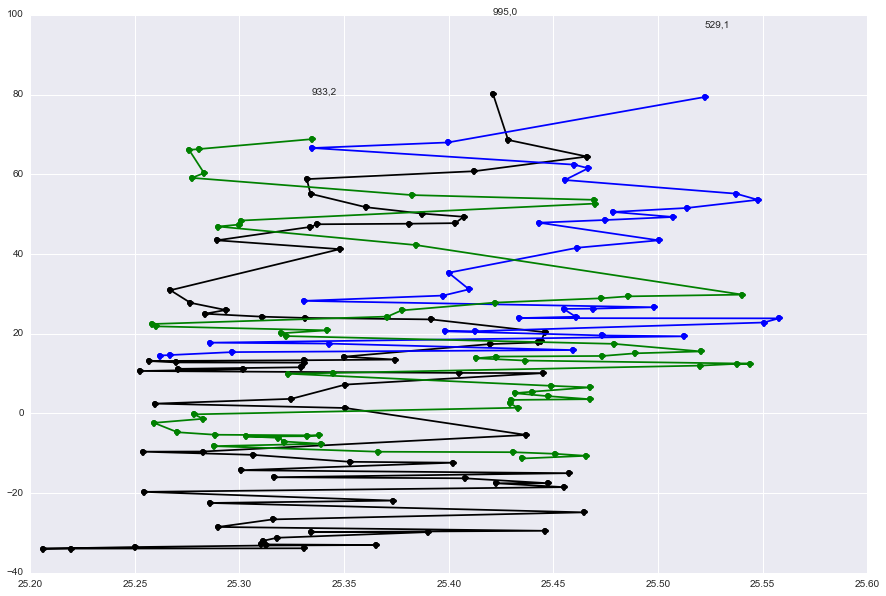

[[3, 0, array([  0,  56, 113, 170]), 2, 0.02005990222025238]]

In [5]:
# dfm = df[mask][0:160]
dfm = df[mask][160:330]
del dfm["TripId"]
N = len(dfm)
breaks2 = np.linspace(0,N,3).astype(int)
breaks3 = np.linspace(0,N,4).astype(int)
out = []
d_ran = [0]
seg_ran = [3]
for d in d_ran:
    for bc in seg_ran:
        b = np.linspace(0,N,bc+1).astype(int)
        dfm["TripId"] = np.nan
        for k,(s,f) in enumerate(window(b)):
            dfm["TripId"][s:f] = k
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
        dfm,score = combo_optimizer(dfm,range(k+1))
#         dfm,score = combo_optimizer(dfm,[0,1,2])
        if dfm.groupby("Weight").agg({"Weight":np.sum}).max().values[0]>1000:
            continue
        out.append([len(np.unique(dfm.TripId)),d,b,k,score])
        plot_trips(dfm,range(10))
        plt.show()
out

0.0268595190959
0.0268595190959 ====================================
0 1 0.0206846610429 ++++++++++++++ 0.0
0.0206846610429 0.0154099885426 0.00527467250037
0.0154099885426 0.0127128987533 0.00269708978931
0.0127128987533 0.0112343963027 0.00147850245056
0.0112343963027 0.0108199691215 0.000414427181219
0.0108199691215 0.0108038367468 1.61323746512e-05
0.0108038367468 0.0108027643075 1.07243933945e-06
0.0108027643075 0.0108023062834 4.58024122501e-07
0.0108023062834 0.0107714856887 3.08205946568e-05
0.0107714856887 0.0107662093332 5.27635553288e-06
0.0107662093332 0.0107661372244 7.21087808509e-08
0.0107661372244 0.0107645858063 1.55141810628e-06
0.0107645858063 0.0107589706562 5.6151500979e-06
0.0107589706562 0.010758100278 8.7037819615e-07
0.010758100278 0.0107501095002 7.99077776041e-06
0.0107501095002 0.0107501014859 8.01429520143e-09
wrote change to df 0.0169249603072
1 2 0.0143995745523 ++++++++++++++ 0.23
0.0143995745523 0.0143961012653 3.47328700324e-06
0.0143961012653 0.014386

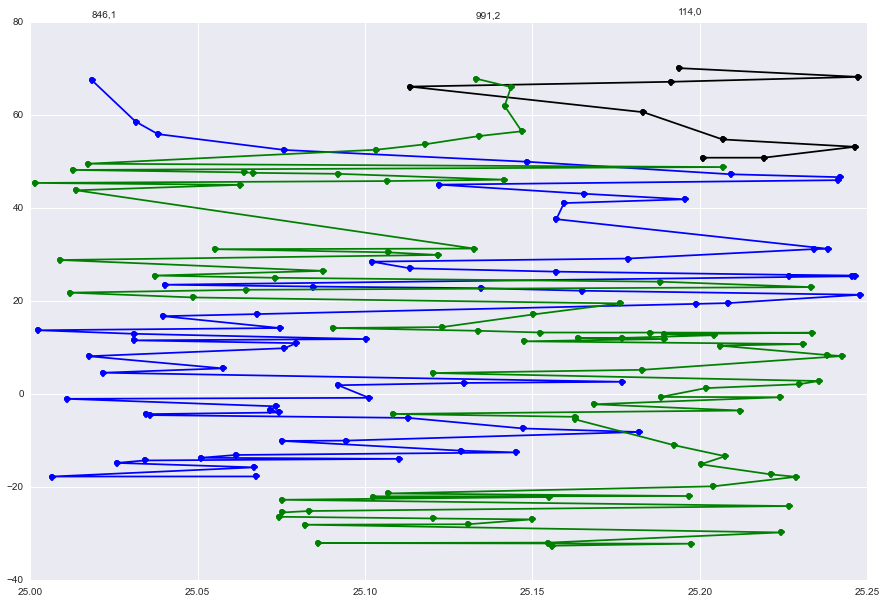

[[3, 0, array([  0,  53, 106, 160]), 2, 0.016831678395001042]]

In [6]:
dfm2 = df[mask][0:160]
# dfm = df[mask][160:330]
del dfm2["TripId"]
N = len(dfm2)
out = []
d_ran = [0]
seg_ran = [3]
for d in d_ran:
    for bc in seg_ran:
        b = np.linspace(0,N,bc+1).astype(int)
        dfm2["TripId"] = np.nan
        for k,(s,f) in enumerate(window(b)):
            dfm2["TripId"][s:f] = k
        dfm2,score = combo_optimizer(dfm2,range(k+1))
        dfm2,score = combo_optimizer(dfm2,range(k+1))
        dfm2,score = combo_optimizer(dfm2,range(k+1))
        dfm2,score = combo_optimizer(dfm2,range(k+1))
        dfm2,score = combo_optimizer(dfm2,range(k+1))
#         dfm,score = combo_optimizer(dfm,[0,1,2])
        if dfm2.groupby("Weight").agg({"Weight":np.sum}).max().values[0]>1000:
            continue
        out.append([len(np.unique(dfm2.TripId)),d,b,k,score])
        plot_trips(dfm2,range(10))
        plt.show()
out

In [ ]:
dfm = combo_optimizer(dfm,[0,1])

In [12]:
dfm
# dfm2.TripId = dfm2.TripId+10
dfm3 = pd.concat([dfm,dfm2])
dfm3,score = combo_optimizer(dfm3,range(20))
dfm3,score = combo_optimizer(dfm3,range(20))
dfm3,score = combo_optimizer(dfm3,range(20))
dfm3,score = combo_optimizer(dfm3,range(20))
dfm3,score = combo_optimizer(dfm3,range(20))

0.0368915806153
0.0368915806153 ====================================
0 1 0.0121731735511 ++++++++++++++ 0.0
1 2 0.01105624938 ++++++++++++++ 0.02
2 3 0.00788672962358 ++++++++++++++ 0.03
3 4 0.0 ++++++++++++++ 0.03
4 5 0.0 ++++++++++++++ 0.03
5 6 0.0 ++++++++++++++ 0.03
6 7 0.0 ++++++++++++++ 0.03
7 8 0.0 ++++++++++++++ 0.03
8 9 0.0 ++++++++++++++ 0.03
9 10 0.000456914895428 ++++++++++++++ 0.03
10 11 0.00810525627014 ++++++++++++++ 0.03
11 12 0.0163747625587 ++++++++++++++ 0.03
0.0163747625587 0.0163733836325 1.37892618718e-06
0.0163733836325 0.0163725566462 8.26986279193e-07
wrote change to df 0.0368893747024
12 13 0.00853888253971 ++++++++++++++ 0.14
13 14 0.0 ++++++++++++++ 0.14
14 15 0.0 ++++++++++++++ 0.14
15 16 0.0 ++++++++++++++ 0.14
16 17 0.0 ++++++++++++++ 0.14
17 18 0.0 ++++++++++++++ 0.14
18 19 0.0 ++++++++++++++ 0.14
0 2 0.0168903834183 ++++++++++++++ 0.14
1 3 0.00316951975646 ++++++++++++++ 0.16
2 4 0.00788672962358 ++++++++++++++ 0.16
3 5 0.0 ++++++++++++++ 0.16
4 6 0.0 +

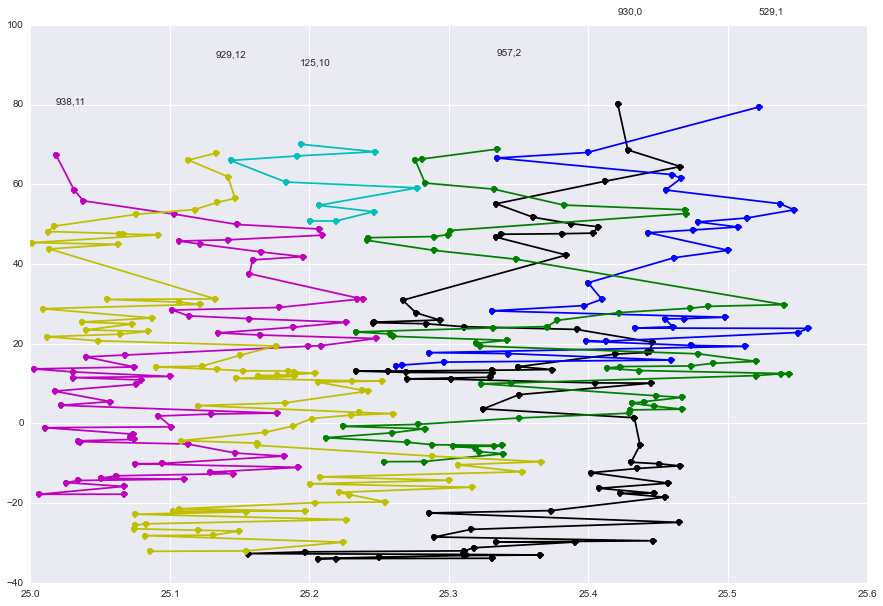

In [13]:
plot_trips(dfm3,range(30))